# 2.1 Dimensionless Harmonic Oscillator

The SchrÃ¶dinger equation:

$$-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)+V(x)\psi(x)=E\psi(x)$$
$$E\psi(x)=-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\psi(x)+V(x)\psi(x)$$
By defining $\tilde{x}=x/x_0=\frac{x}{\sqrt{\hbar/m\omega}}$ and $\tilde{\psi}(\tilde{x})=\psi(x)$ we can rewrite this using the chain rule to
$$E\tilde{\psi}(\tilde{x})=-\frac{\hbar^2}{2m}\left(\frac{d\tilde{x}}{dx}\right)^2\frac{d^2}{d\tilde{x}^2}\tilde{\psi}(\tilde{x})+V(\tilde{x}x_0)\tilde{\psi}(\tilde{x})$$
$$E\tilde{\psi}(\tilde{x})=-\frac{\hbar^2}{2m}\frac{m\omega}{\hbar}\frac{d^2}{d\tilde{x}^2}\tilde{\psi}(\tilde{x})+V(\tilde{x}x_0)\tilde{\psi}(\tilde{x})$$
We define $\tilde{E}=E/E_0$ with $E_0=\hbar\omega$ and $\tilde{V}(\tilde{x})=V(x)/E_0$
$$\tilde{E}\tilde{\psi}(\tilde{x})=-\frac{1}{2}\frac{d^2}{d\tilde{x}^2}\tilde{\psi}(\tilde{x})+\tilde{V}(\tilde{x})\tilde{\psi}(\tilde{x})$$

In [1]:
#import packages and declare general solver using sparse matricies to maximize performance
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

def calcBoundStates(x,pot, k):
    T = -1/(2*(x[1]-x[0])**2)*scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(len(x), len(x)))
    V = scipy.sparse.diags(pot(x))
    H = T+V
    #calculate states closest to the minimum potential
    eigValues, eigVectors = scipy.sparse.linalg.eigsh(H, k, sigma=np.min(pot(x)), which='LA',return_eigenvectors=True)
    return (eigValues,eigVectors)

# 3.1 The harmonic oscillator

In [2]:
# Declare harmonic oscillator function
def PotHarmonic(x):
    return 1/2*x**2

#### 1. Plot the lowest eigenstates of the Hamilton. Do they look like you expect? How many nodes does the $n$th eigenstate have?

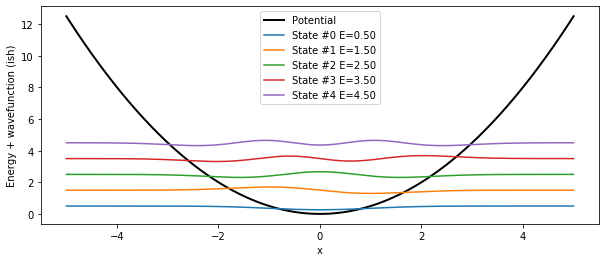

In [3]:
plt.figure(figsize=(10,4))
L = 5
x = np.linspace(-L,L,10000)
eigValues,eigVectors = calcBoundStates(x,PotHarmonic,5)
plt.plot(x,PotHarmonic(x),color='k', label = "Potential", linewidth=2)

for n in range(len(eigValues)):
    plt.plot(x, eigVectors[:,n]*2*L+eigValues[n],label="State #{:.0f} E={:.2f}".format(n, eigValues[n]))
l = plt.legend()
plt.xlabel("x")
l = plt.ylabel("Energy + wavefunction (ish)")

As expected, the states look loke what is shown in figure 2.7(a) of Griffiths. for the n'th eigenstate, we have n nodes (indexing with 0). Note: We multiply with 2L to make the shapes visible

#### 2. Plot and consider the energy of the states with n = 30 to n = 35 for L = 5. Are your results what you expect? What if you chose L = 10?

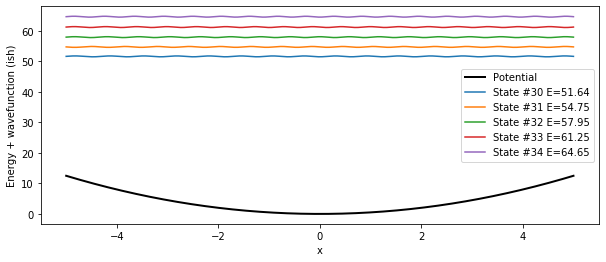

In [4]:
# plot for L=5
plt.figure(figsize=(10,4))
L = 5
x = np.linspace(-L,L,10000)
eigValues,eigVectors = calcBoundStates(x,PotHarmonic,35)
plt.plot(x,PotHarmonic(x),color='k', label = "Potential", linewidth=2)
for n in range(30,35):
    plt.plot(x, eigVectors[:,n]*2*L+eigValues[n],label="State #{:.0f} E={:.2f}".format(n, eigValues[n]))
l = plt.legend()
plt.xlabel("x")
l = plt.ylabel("Energy + wavefunction (ish)")

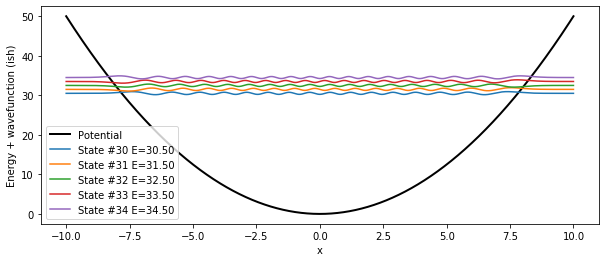

In [5]:
#plot for L=10
plt.figure(figsize=(10,4))
L = 10
x = np.linspace(-L,L,10000)
eigValues,eigVectors = calcBoundStates(x,PotHarmonic,35)
plt.plot(x,PotHarmonic(x),color='k', label = "Potential", linewidth=2)
for n in range(30,35):
    plt.plot(x, eigVectors[:,n]*2*L+eigValues[n],label="State #{:.0f} E={:.2f}".format(n, eigValues[n]))
plt.legend()
plt.xlabel("x")
l = plt.ylabel("Energy + wavefunction (ish)")

As can be seen from e.g. the energies, our result are garbage for L=5. Our model effectively treats the potential at $x<L$ and $x>L$ as infinite. Therefore with a big enough energy, this will approch the infinite square well. Incressing L makes the approximation better, since the boundery conditions approch those of the actual harmonic oscillator

#### 3. Plot the position $x_n$ of the highest probability density $|Ïˆ_n(x)|^2$ in the nth eigenstate as a function of $n$. How does this position compare with what you would expect from a classical argument based on the energy?

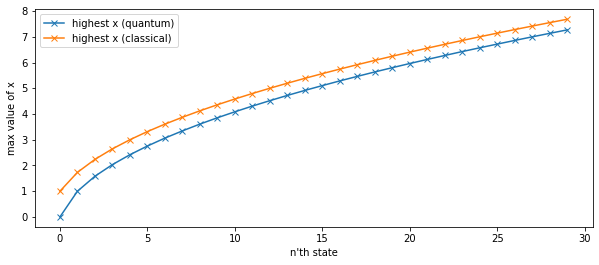

In [6]:
plt.figure(figsize=(10,4))
L = 10
x = np.linspace(-L,L,10000)
eigValues,eigVectors = calcBoundStates(x,PotHarmonic,30)
maxX = np.argmax(eigVectors**2,axis=0)
plt.plot(np.arange(len(eigValues)),np.abs(x[maxX]), "x-", label = "highest x (quantum)")
plt.plot(np.arange(len(eigValues)),np.sqrt(2*eigValues), "x-", label = "highest x (classical)")
l = plt.legend()
plt.xlabel("n'th state")
l = plt.ylabel("max value of x")

To calculate the classical position of highest propability, we say this must be the point where the oscillator has the lowest speed, e.g. at the classical limit V(x)=1/2x^2=E => x=sqrt(E*2). As expected, the difference between the quantum and classical case decreeses slowly as the energy increeses and we get less "quantum". I have taken the absolute value, to not have the graph jump randomly between negative and positive values, since the propability is symetric over x, ind this is just a computational anomaly.

#### 4. Calculate the probability $P_n(x > X)$ that a particle in the nth eigenstate is found at a position with an x-value larger than X

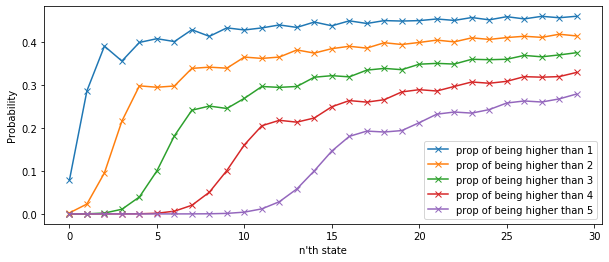

In [7]:
plt.figure(figsize=(10,4))
L = 20 #chose large L to avoid problems with the edge conditions
x = np.linspace(-L,L,10000)
eigValues,eigVectors = calcBoundStates(x,PotHarmonic,30)
for X in [1, 2, 3, 4, 5]:
    plt.plot(np.arange(len(eigValues)),np.sum(eigVectors[x>X]**2,axis=0), "x-", label = "prop of being higher than {:.0f}".format(X))
l = plt.legend()
plt.xlabel("n'th state")
l = plt.ylabel("Probability")

When n, and the energy, is small, it will be centered in the middle. There is low propability of measuring a particle with a given energy E at a position at which the potential is heigher than E. Therefore the propabily goes quickly up when the particle has enough energy to "reach" a given point of the potential. We see this, since the graphs are steepest, where the graph from the previous task crosses the respective value.

Another interesting behaviour is the oscillation of the propability after the steep rise. This is due to the wave-like look of the stationary states, and therefore the propability changes as successive wave peaks cross the respective x.

# 3.2 Gaussian potential

In [8]:
# Declare harmonic oscillator function
def PotGaussian(V0, sigma):
    return lambda x: -V0*np.exp(-x**2/sigma**2)

#### 1. Start by checking that your program gives reasonable results.

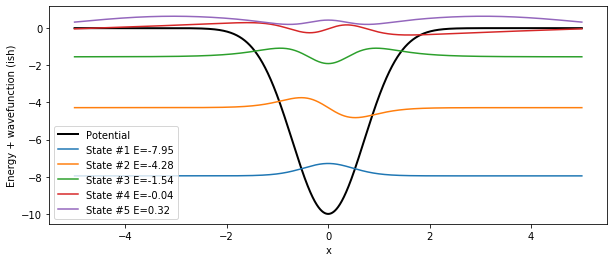

In [9]:
plt.figure(figsize=(10,4))
L = 5
x = np.linspace(-L,L,10000)
eigValues,eigVectors = calcBoundStates(x,PotGaussian(10,1),5)
plt.plot(x,PotGaussian(10,1)(x),color='k', label = "Potential", linewidth=2)
for n in range(len(eigValues)):
    plt.plot(x, eigVectors[:,n]*4*L+eigValues[n],label="State #{:.0f} E={:.2f}".format(n+1, eigValues[n]))
l = plt.legend()
plt.xlabel("x")
l = plt.ylabel("Energy + wavefunction (ish)")

The energies seeme reasonable, since they are of the same scale as the potential, above the minima, and (mostly) below zero. States 4 and 5 are above 0, which corresponds to free states. But our edge conditions is equvilant to the infinite potential well, so those dont really exist. Therefore we cannot trust these. The wave functions look a bit like those for the harmonic oscillator, with the normal even-odd order. 

#### 2.  What happens to the ground state energy as the strength of the potential increases?

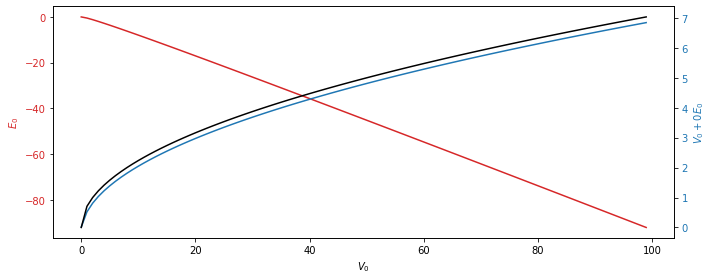

In [10]:
L = 10
x = np.linspace(-L,L,1000)
E0 = []
V0 = np.arange(100)
for v in V0:
    eigValues,eigVectors = calcBoundStates(x,PotGaussian(v,1),1)
    E0.append(eigValues[0])
E0 = np.array(E0)
fig, ax1 = plt.subplots(figsize=(10,4))
color = 'tab:red'
ax1.set_xlabel('$V_0$')
ax1.set_ylabel('$E_0$', color= color)
ax1.plot(V0, E0, color= color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('$V_0+0E_0$', color=color)
ax2.plot(V0, V0+E0, color=color)
ax2.plot(V0, np.sqrt(1/2*V0), color="Black")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
l = plt.show()

The energy of the ground state decreeses almost linearly with the potential, as could be expected, since this is almost just a rescaling factor of the characteristic energy $E_c$. The reason then the energy is not excactly linear, is due to the narrowing of the potential. Furthermore i have plotted in black $\sqrt{V_0/2}$ for reference in next task

3. What happens to the energy difference between the ground and first excited state E1 âˆ’ E0 as a function of V0?

The potential can be taylor expanded. We want to expand the potential to 2.nd order around the minimum $x_0=0$, so we can calculate it as a harmonic oscillator:
$$\tilde{V}=-\tilde{V}_0e^{-\tilde{x}^2}\approx(-\tilde{V}_0e^{-\tilde{x}^2})|_{\tilde{x}_0=0}+(-2x\tilde{V}_0e^{-\tilde{x}^2})|_{\tilde{x}=0}(\tilde{x})+(-(4\tilde{x}^2-2)\tilde{V}_0e^{-\tilde{x}^2}/2)|_{\tilde{x}_0=0}x^2$$
$$=-\tilde{V}_0+\tilde{V}_0x^2$$
Since we are only interested in the energy difference between E1 and E0, we will redefine the potential to get rid of the constant, and we get:
$$\tilde{V}(\tilde{x})=\tilde{V}_0\tilde{x}^2$$
and who would have guessed? The harmonic oscillator. Our old friend!
We can cast this back from dimiensionless form by using the definitions of $\tilde{V}(\tilde{x})$ and $\tilde{x}$ in the start of the assignment
$$\frac{V(x)}{\omega\hbar}=\tilde{V_0}\frac{m\omega}{\hbar}x^2$$
$$V(x)=\tilde{V_0}m\omega^2x^2$$
We now recognise the potential for which we know the solution: If we define $\omega'=\omega\sqrt{2\tilde{V_0}}$ the above can be rewritten to 
$$V(x)=\frac{1}{2}m\omega'^2x^2$$
for which the solutions are:
$E_n=(n+\frac12)\hbar\omega'$
Or when written unitless:
$\tilde{E_n}=(n+\frac12)\sqrt{2\tilde{V_0}}$

The difference $\tilde{E_1}-\tilde{E_0}$ is therefore
$$\tilde{E_1}-\tilde{E_0}=(1+\frac12)\sqrt{2\tilde{V_0}}-\frac12\sqrt{2\tilde{V_0}}=\sqrt{2\tilde{V_0}}$$

Nummericly, we find:

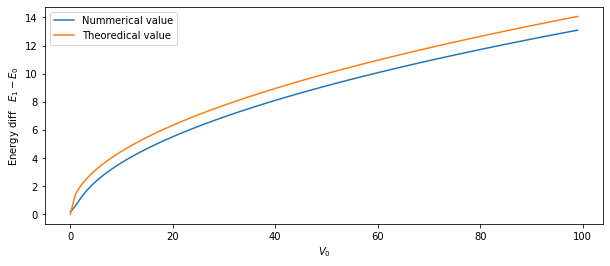

In [11]:
plt.figure(figsize=(10,4))
L = 5
x = np.linspace(-L,L,100)
E10 = []
V0 = np.arange(100)
for v in V0:
    eigValues,eigVectors = calcBoundStates(x,PotGaussian(v,1),2)
    E10.append(eigValues[1]-eigValues[0])
plt.plot(V0,E10,label="Nummerical value")
plt.plot(V0,np.sqrt(2*V0),label="Theoredical value")
l = plt.legend()
plt.xlabel("$V_0$")
l = plt.ylabel("Energy diff   $E_1-E_0$")

Considering the approximation that is only second order expansion, this is actually quite good fit

#### 4. How many bound state does the potential have as a function of V0?

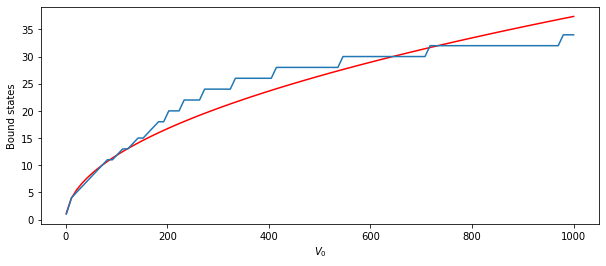

In [12]:
from scipy.optimize import curve_fit
def sqrt(V0, a):
    return a * np.sqrt(V0)
plt.figure(figsize=(10,4))
L = 5
x = np.linspace(-L,L,100)
V0=np.linspace(1,1000,100)
bound = []
for v in V0:
    eigValues,eigVectors = calcBoundStates(x,PotGaussian(v,1),50)
    bound.append((eigValues<0).sum())
bound = np.array(bound)
popt, pcov = curve_fit(sqrt,V0,bound)
plt.plot(V0, sqrt(V0, *popt), 'r-',)
plt.plot(V0, bound)
plt.xlabel("$V_0$")
l = plt.ylabel("Bound states")

This does indeed look kinda like the square root

#### 5. How does the number of bound states vary with width $\sigma$

###### The explanation you hinted at:
We defined $$E_c=\frac{\hbar^2}{mx_0^2}=\frac{\hbar^2}{m\sigma^2}$$ This means that $\tilde{V_0}=V_0/E_c$ is proportional to $\sigma^2$, and therefore the number of bound states is proportional to $\sigma$

/opt/conda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


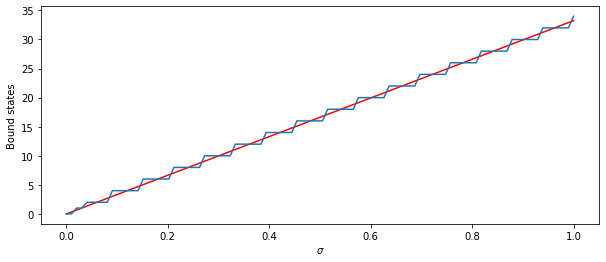

In [13]:
from scipy.optimize import curve_fit
def linear(sigma, a):
    return a * sigma
plt.figure(figsize=(10,4))
L = 5
x = np.linspace(-L,L,100)
sigma = np.linspace(0,1,100)
bound = []
for s in sigma:
    eigValues,eigVectors = calcBoundStates(x,PotGaussian(1000,s),50)
    bound.append((eigValues<0).sum())
bound = np.array(bound)
popt, pcov = curve_fit(linear,sigma,bound)
plt.plot(sigma, linear(sigma, *popt), 'r-',)
plt.plot(sigma, bound)
plt.xlabel("$\sigma$")
l = plt.ylabel("Bound states")

Yes, linear indeed

#### 6. At which wavelength will the electron emit light if it jumps from the first excited state to the ground state?

The chacteristic energy is defined as $$E_c=\frac{\hbar^2}{m\sigma^2}=\frac{(1.03\cdot10^{-34}Js)^2}{9.11\cdot10^{-31}kg\cdot(3\cdot10^{-10}m)^2}=1.36\cdot10^{-19}J=0.849eV$$
so:
$\tilde{V}_0=\frac{3eV}{0.85eV}=3.53$

we of cause set $\tilde{x}_0=1$ by definition

1.812146635944468


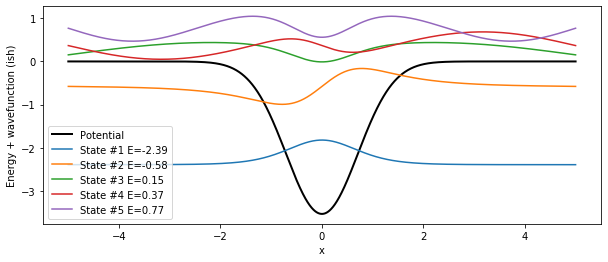

In [14]:
plt.figure(figsize=(10,4))
L = 5
x = np.linspace(-L,L,10000)
eigValues,eigVectors = calcBoundStates(x,PotGaussian(3.53,1),5)
plt.plot(x,PotGaussian(3.53,1)(x),color='k', label = "Potential", linewidth=2)
for n in range(len(eigValues)):
    plt.plot(x, eigVectors[:,n]*4*L+eigValues[n],label="State #{:.0f} E={:.2f}".format(n+1, eigValues[n]))
l = plt.legend()
plt.xlabel("x")
l = plt.ylabel("Energy + wavefunction (ish)")
print(eigValues[1]-eigValues[0])

The calculated energy difference is (as kan bee seen printed above the graph) $\Delta\tilde{V}=1.81$. This corresponds to an energy difference of $\Delta E=\Delta\tilde{V}\cdot E_c=1.54eV$ This correspends to a wavelength of $\lambda=\frac{c\cdot h}{\Delta E}=806nm$

#### 3.3 Time evolution

This is quite simple. We first expand the initial state with fouriers trick in a basis of eigenstates to the Hamiltonion. Then for each time step we multiply the wiggle factor to each coefficient, and multiply with the respective eigenstates to get back into position domain. We just need to write the wiggle factor without units:
$$e^{-iE_nt/\hbar}=e^{-i\tilde{E_n}E_0t/\hbar}=e^{-i\tilde{E_n}\omega t}=e^{-i\tilde{E_n} \tilde{t}}$$
(In the last step, we defined $\tilde{t}=\omega t$

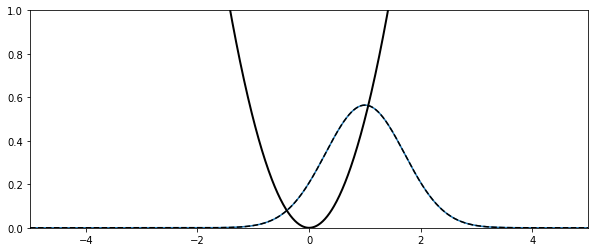

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.figure(figsize=(10,4))
x = np.linspace(-L,L,1000)
dx = x[1]-x[0]
plt.gca().axis([x[0],x[-1],0,1])
l, = plt.gca().plot([],[])

eigValues,eigVectors = calcBoundStates(x,PotHarmonic,50)
plt.plot(x,PotHarmonic(x),color='k', label = "Potential", linewidth=2)
ititialState = np.roll(eigVectors[:,0],100) # offset gound state
plt.plot(x,ititialState**2/dx,"k--") # plot initial state
coefficient = np.matmul(np.transpose(eigVectors),ititialState) # transform to stationary state space

timestep = 0.1
def animate(i):
    tCoef = coefficient*np.exp(-1.j*eigValues*(i*timestep)) # time evolve coefficients
    l.set_data(x, np.absolute(np.matmul(eigVectors,tCoef))**2/dx) # transform to position space, apply |x|^2 and scale to view.

matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=60,interval=50)

-1


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


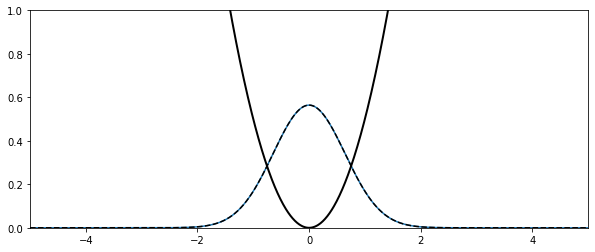

In [16]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
print(plt.rcParams['animation.bitrate'])
plt.figure(figsize=(10,4))
x = np.linspace(-L,L,1000)
dx = x[1]-x[0]
plt.gca().axis([x[0],x[-1],0,1])
l, = plt.gca().plot([],[])

eigValues,eigVectors = calcBoundStates(x,PotHarmonic,200)
plt.plot(x,PotHarmonic(x),color='k', label = "Potential", linewidth=2)
ititialState = np.interp(np.linspace(-L*1.1,L*1.1,1000),x,eigVectors[:,0]) # widen gound state
plt.plot(x,ititialState**2/dx,"k--") # plot initial state
coefficient = np.matmul(np.transpose(eigVectors),ititialState) # transform to stationary state space

timestep = 0.1
def animate(i):
    tCoef = coefficient*np.exp(-1.j*eigValues*(i*timestep)) # time evolve coefficients
    l.set_data(x, np.absolute(np.matmul(eigVectors,tCoef))**2/dx) # transform to position space, apply |x|^2 and scale to view.

ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=60,interval=50)
ani.save('im.tiff')

We see an interesting wiggle factor, which is propably due to us chopping off the tails of the gaussian.

In [17]:
#import packages and declare general solver using sparse matricies to maximize performance
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh

def calcBoundStates2D(r, pot, k):
    T = -1/(2*(x[1]-x[0])**2)*scipy.sparse.diags([1, -2, 1], [-1, 0, 1], shape=(len(x), len(x)))
    V = scipy.sparse.diags(pot(x))
    H = T+V
    #calculate states closest to the minimum potential
    eigValues, eigVectors = scipy.sparse.linalg.eigsh(H, k, sigma=np.min(pot(x)), which='LA',return_eigenvectors=True)
    return (eigValues,eigVectors.reshape())